In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import sys
import json
import os
import numpy as np

In [2]:
path_to_exp = os.getcwd() + "/runs"
all_exps = [f.path for f in os.scandir(path_to_exp)]

In [3]:
scores = [json.load(open(path + "/scores.json"))
            for path in all_exps if os.path.isfile(path + "/scores.json")]
dicts = [json.load(open(path + "/exp_dict.json"))
            for path in all_exps if os.path.isfile(path + "/scores.json")]

In [4]:
for exp_dict, scores in zip(dicts, scores):
    if "proba" not in exp_dict.keys():
        exp_dict["proba"] = None
    exp_dict["scores"] = scores

In [5]:
relevant_params = ["step_params", "scale_step_v", "proba", "n_inner_sinkhorn", "sinkhorn"]

In [6]:
legends = []
for exp_dict in dicts:
    legend = ""
    for param in relevant_params:
        legend += str(param) + "={} ".format(exp_dict[param])
    legends.append(legend)

In [7]:
unique_param_settings = []
for exp_dict in dicts:
    param_setting = {key: value for key, value in exp_dict.items() if key in relevant_params}
    if param_setting not in unique_param_settings:
        unique_param_settings.append(param_setting)

In [8]:
scores_per_param = []
for param_setting in unique_param_settings:
    param_setting_copy = param_setting.copy()
    scores_per_param.append(param_setting_copy)
    param_setting_copy["scores"] = []
    k = 0
    for exp_dict in dicts:
        k += 1
        if {key: value for key, value in exp_dict.items() if key in relevant_params} == param_setting:
            if len(exp_dict["scores"]) > 398:
                param_setting_copy["scores"].append(exp_dict["scores"])
    param_setting_copy["scores"] = np.array(param_setting_copy["scores"], dtype=object).astype(float)

In [9]:
stacked_results_ordered = []
order_hyperparams = [(0.5, False), (0.9, False), (0.95, False), (None, True)]

for hyper in order_hyperparams:
    for stacked_result in scores_per_param:
        if (stacked_result['proba'], stacked_result['sinkhorn']) == hyper:
            stacked_results_ordered.append(stacked_result)

In [10]:
custom_legend = [r'$p=0.5$',
                 r'$p=0.9$',
                 r'$p=0.95$',
                 r'$m_{sin}=1$',
                ]

/Users/othmanesebbouh/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


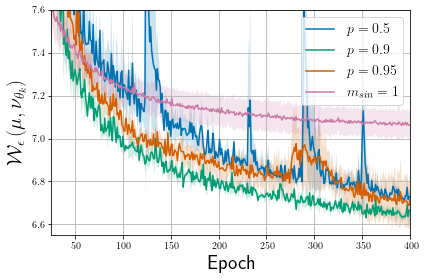

In [11]:
rc = {"pdf.fonttype": 42, 'text.usetex': True, 'text.latex.preview': True}
plt.rcParams.update(rc)

plt.style.use('seaborn-colorblind')

ax = plt.subplot()
for exp_dict in stacked_results_ordered:
    mean = exp_dict["scores"].mean(axis=0)
    if len(exp_dict["scores"]) == 1:
        std = 0
    else:
        std = np.std(exp_dict["scores"], axis=0)
    ax.plot(mean)
    ax.fill_between(range(len(mean)), mean + std, mean - std, alpha = 0.2)
ax.set_xlim([25, 400])
ax.legend(custom_legend, fontsize=14, loc="upper right")
ax.set_ylim([6.55, 7.6])
ax.set_xlabel("Epoch", fontsize=20)
ax.set_ylabel(r"$\mathcal{W}_{\epsilon}\left(\mu, \nu_{\theta_k}\right)$",
             fontsize=20)
ax.grid()

plt.tight_layout()
plt.savefig("../figures/fig4.png", 
            bbox_inches='tight', pad_inches=0.02, dpi=200, facecolor='white')